In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def f(t, y):
    return -y / t + np.sin(t)

def y_true_func(t):
    return (np.sin(t) - t * np.cos(t) - np.pi + 1) / t


t0, t1 = np.pi, np.pi + 1
y0 = 1 / np.pi
h = 0.1

In [71]:
def euler(f, t0, y0, t1, h=0.1):
    """
    Функция, решающяя дифференциальное уравнение через метод Эйлера
    """
    n = int((t1 - t0) // h)  # количество отрезков разбиения

    t_arr = np.linspace(t0, t1, n + 1)  # разбиваем время на нужное количество отрезков
    y_arr = np.zeros(n + 1)

    y_arr[0] = y0
    for i in range(n):  # вычисляем y в точках разбиения
        y_arr[i + 1] = y_arr[i] + h * f(t_arr[i], y_arr[i])
    return t_arr, y_arr

In [75]:
def rkfixed(f, t0, y0, t1, h=0.1):
    """
    Функция, решающяя дифференциальное уравнение через метод Рунге-Кутты
    """
    n = int((t1 - t0) // h)  # количество отрезков разбиения

    t_arr = np.linspace(t0, t1, n + 1)  # разбиваем время на нужное количество отрезков
    y_arr = np.zeros(n + 1)
    
    y_arr[0] = y0
    for i in range(n):
        k1 = f(t_arr[i], y_arr[i])
        k2 = f(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * k1)
        k3 = f(t_arr[i] + 0.5 * h, y_arr[i] + 0.5 * k2)
        k4 = f(t_arr[i] + h, y_arr[i] + h * k3)
        k = (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_arr[i + 1] = y_arr[i] + h * k
    return t_arr, y_arr

In [76]:
t_euler, y_euler = euler(f, t0, y0, t1, h)
t_rk, y_rk = rkfixed(f, t0, y0, t1, h)

t_true = np.linspace(t0, t1, 100)
y_true = y_true_func(t_true)

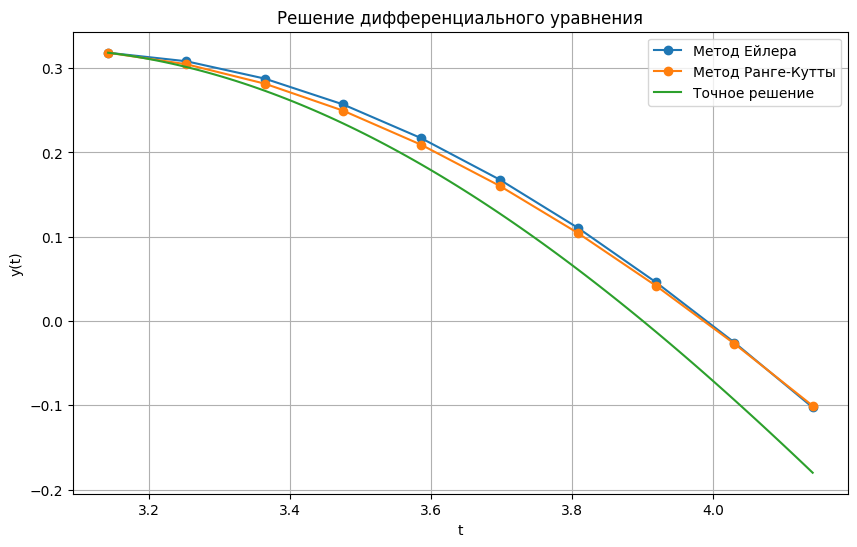

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(t_euler, y_euler, 'o-', label='Метод Ейлера')
plt.plot(t_rk, y_rk, 'o-', label='Метод Ранге-Кутты')
plt.plot(t_true, y_true, label='Точное решение')
plt.title('Решение дифференциального уравнения')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)